<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:80px;
            text-align: center;
            padding-top: 10px;"> <h1 style="color: white;">MonkeyPox Data Analysis</h1> </div>

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height: 60px;
            text-align: center;
            width: 800px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Importing libreries</h2> </div>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import math
import seaborn as sns
from sklearn import preprocessing

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:60px;
            text-align: center;
            width: 800px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Getting data</h2> </div>

In [2]:
casesCountry_dataset = pd.read_csv("Daily_Country_Wise_Confirmed_Cases.csv").rename(columns={'Country':'Date'}).set_index('Date')
casesCountry_dataset.head(5)

2022-01-31  2022-02-17  2022-02-28  2022-03-04  \
Date                                                                       
Nigeria                            3           0           1           0   
Cameroon                           0           3           0           0   
Central African Republic           0           0           0           2   
Republic of Congo                  0           0           0           0   
England                            0           0           0           0   

                          2022-03-31  2022-04-10  2022-04-12  2022-04-30  \
Date                                                                       
Nigeria                            6           0           0           5   
Cameroon                           0           0           0           0   
Central African Republic           0           4           0           0   
Republic of Congo                  0           0           2           0   
England                            0           0           0           0   

                          2022-05-06  2022-05-08  ...  2022-08-03  2022-08-04  \
Date                                              ...                           
Nigeria                            0           0  ...           0           0   
Cameroon                           0           0  ...           0           0   
Central African Republic           0           0  ...           0           0   
Republic of Congo                  0           0  ...           0           0   
England                            1           0  ...           0          92   

                          2022-08-05  2022-08-06  2022-08-07  2022-08-08  \
Date                                                                       
Nigeria                            0           0           0           0   
Cameroon                           0           0           0           0   
Central African Republic           0           0           0           0   
Republic of Congo                  0           0           0           0   
England                            0           0           0         153   

                          2022-08-09  2022-08-10  2022-08-11  2022-08-12  
Date                                                                      
Nigeria                            0           0           0           0  
Cameroon                           0           0           0           0  
Central African Republic           0           0           0           0  
Republic of Congo                  0           0           0           0  
England                            0           0           0           0  

[5 rows x 100 columns]

In [3]:
informationCountries_dataset = pd.read_csv("countries of the world.csv")
informationCountries_dataset.head(5)

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                             163,07               700.0   
1         -4,93                              21,52              4500.0   
2         -0,39                                 31              6000.0   
3        -20,71                               9,27              8000.0   
4           6,6                               4,05             19000.0   

  Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0         36,0               3,2      12,13      0,22     87,65       1   
1         86,5              71,2      21,09      4,42     74,49       3   
2         70,0              78,1       3,22      0,25     96,53       1   
3         97,0             259,5         10        15        75       2   
4        100,0             497,2       2,22         0     97,78       3   

  Birthrate Deathrate Agriculture Industry Service  
0      46,6     20,34        0,38     0,24    0,38  
1     15,11      5,22       0,232    0,188   0,579  
2     17,14      4,61       0,101      0,6   0,298  
3     22,46      3,27         NaN      NaN     NaN  
4      8,71      6,25         NaN      NaN     NaN

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:60px;
            text-align: center;
            width: 800px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Data exploration</h2> </div>

In [4]:
palette = ["#00278f", "#063fae", "#0858ce", "#0572ee", "#448eff", "#76adff", "#9acdff", "#b8eeff"]

In [5]:
casesCountry_dataset = casesCountry_dataset.transpose()

In [6]:
casesCountry_dataset.describe().T

count   mean        std  min  25%  50%    75%    max
Date                                                                          
Nigeria                   100.0   1.57   4.649872  0.0  0.0  0.0   0.00   24.0
Cameroon                  100.0   0.07   0.432400  0.0  0.0  0.0   0.00    3.0
Central African Republic  100.0   0.08   0.485757  0.0  0.0  0.0   0.00    4.0
Republic of Congo         100.0   0.03   0.222702  0.0  0.0  0.0   0.00    2.0
England                   100.0  28.83  61.767576  0.0  0.0  0.0  14.25  275.0
...                         ...    ...        ...  ...  ...  ...    ...    ...
Cyprus                    100.0   0.03   0.222702  0.0  0.0  0.0   0.00    2.0
Lithuania                 100.0   0.05   0.297294  0.0  0.0  0.0   0.00    2.0
Guatemala                 100.0   0.03   0.171447  0.0  0.0  0.0   0.00    1.0
Moldova                   100.0   0.01   0.100000  0.0  0.0  0.0   0.00    1.0
Greenland                 100.0   0.02   0.200000  0.0  0.0  0.0   0.00    2.0

[93 rows x 8 columns]

In [7]:
#Elimina espacios en blanco al inicio y final de los nombres de los países
for i in range(0, len(informationCountries_dataset['Country'])):
    informationCountries_dataset['Country'][i] = informationCountries_dataset['Country'][i].strip()

In [8]:
informationCountries_dataset = informationCountries_dataset[informationCountries_dataset['Country'].isin(casesCountry_dataset.keys().values)]

In [9]:
final_dataset = informationCountries_dataset[['Country', 'Region', 'Population']]
final_dataset.shape

(82, 3)

In [10]:
temp = pd.DataFrame()
temp['Country'] = casesCountry_dataset.sum().index
temp['Cases'] = casesCountry_dataset.sum().values
temp = temp.sort_values(by='Country', ascending=True)
temp = temp[temp['Country'].isin(final_dataset['Country'])]
final_dataset['Cases'] = (temp[temp['Country'].isin(final_dataset['Country'])])['Cases'].values
final_dataset

Country                               Region  Population  \
4                 Andorra  WESTERN EUROPE                            71201   
8               Argentina              LATIN AMER. & CARIB        39921833   
11              Australia  OCEANIA                                20264082   
12                Austria  WESTERN EUROPE                          8192880   
17               Barbados              LATIN AMER. & CARIB          279912   
..                    ...                                  ...         ...   
206                Turkey  NEAR EAST                              70413958   
212  United Arab Emirates  NEAR EAST                               2602713   
214         United States  NORTHERN AMERICA                      298444215   
215               Uruguay              LATIN AMER. & CARIB         3431932   
218             Venezuela              LATIN AMER. & CARIB        25730435   

     Cases  
4        4  
8       49  
11      71  
12     198  
17       1  
..     ...  
206      5  
212     16  
214  11130  
215      2  
218      1  

[82 rows x 4 columns]

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:60px;
            text-align: center;
            width: 600px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Total cases by country</h2> </div>

### Top 5 countries with the most cases

In [11]:
toGraph = final_dataset.sort_values(by='Cases', ascending=False)[:8]

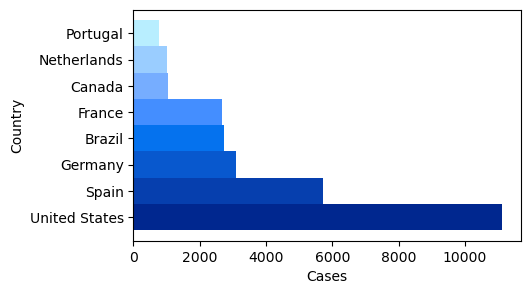

In [12]:
plt.figure(figsize=(5, 3))
plt.barh(toGraph['Country'], toGraph['Cases'], color=palette, height=1)
plt.xlabel('Cases')
plt.ylabel('Country')
plt.show()

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:60px;
            text-align: center;
            width: 600px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Case graphs by country</h2> </div>

### Cumulative frequency

<function matplotlib.pyplot.show(close=None, block=None)>

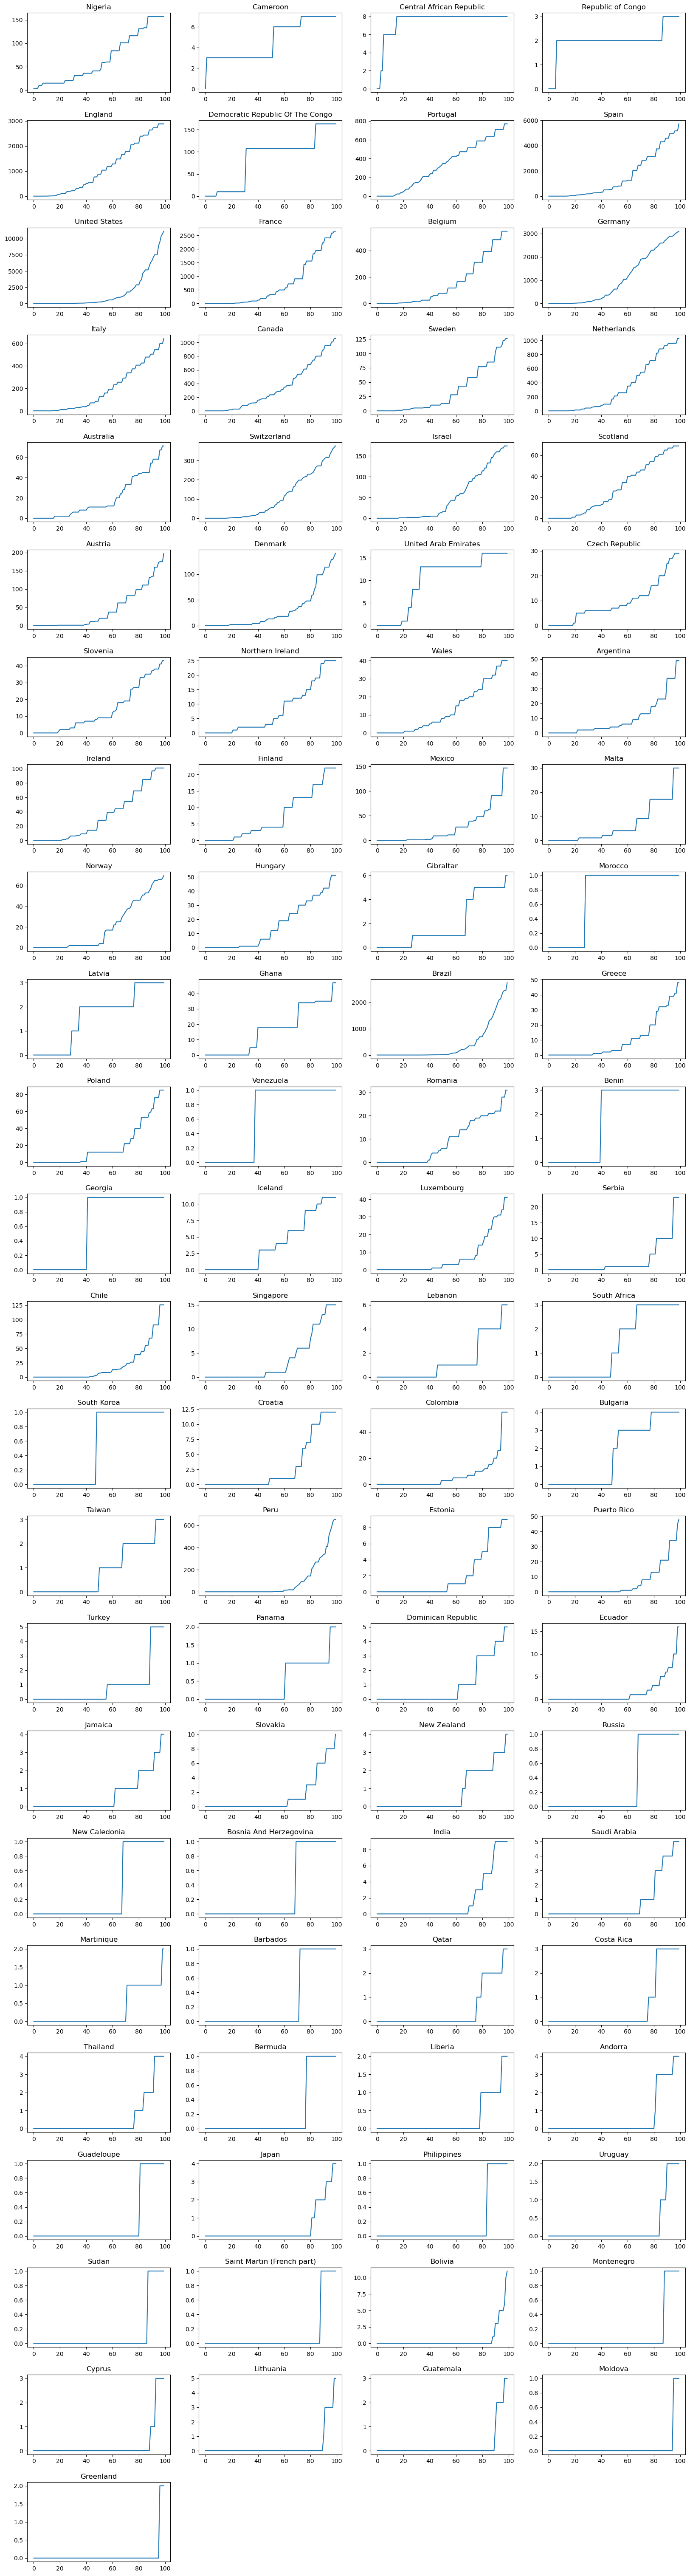

In [13]:
plt.figure(figsize=(20,75))
for j in range(0, len(casesCountry_dataset.columns.values)):
    temp = 0
    X = []
    Y = []
    for i in range(0, len(casesCountry_dataset.iloc[:,j])):
        Y.append(i)
        X.append(temp + casesCountry_dataset.iloc[:,j][i])
        temp = X[i]
    plt.subplot(24,4,j+1)
    plt.plot(Y,X)
    plt.title(casesCountry_dataset.columns.values[j])

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show

### Absolute frequency

<function matplotlib.pyplot.show(close=None, block=None)>

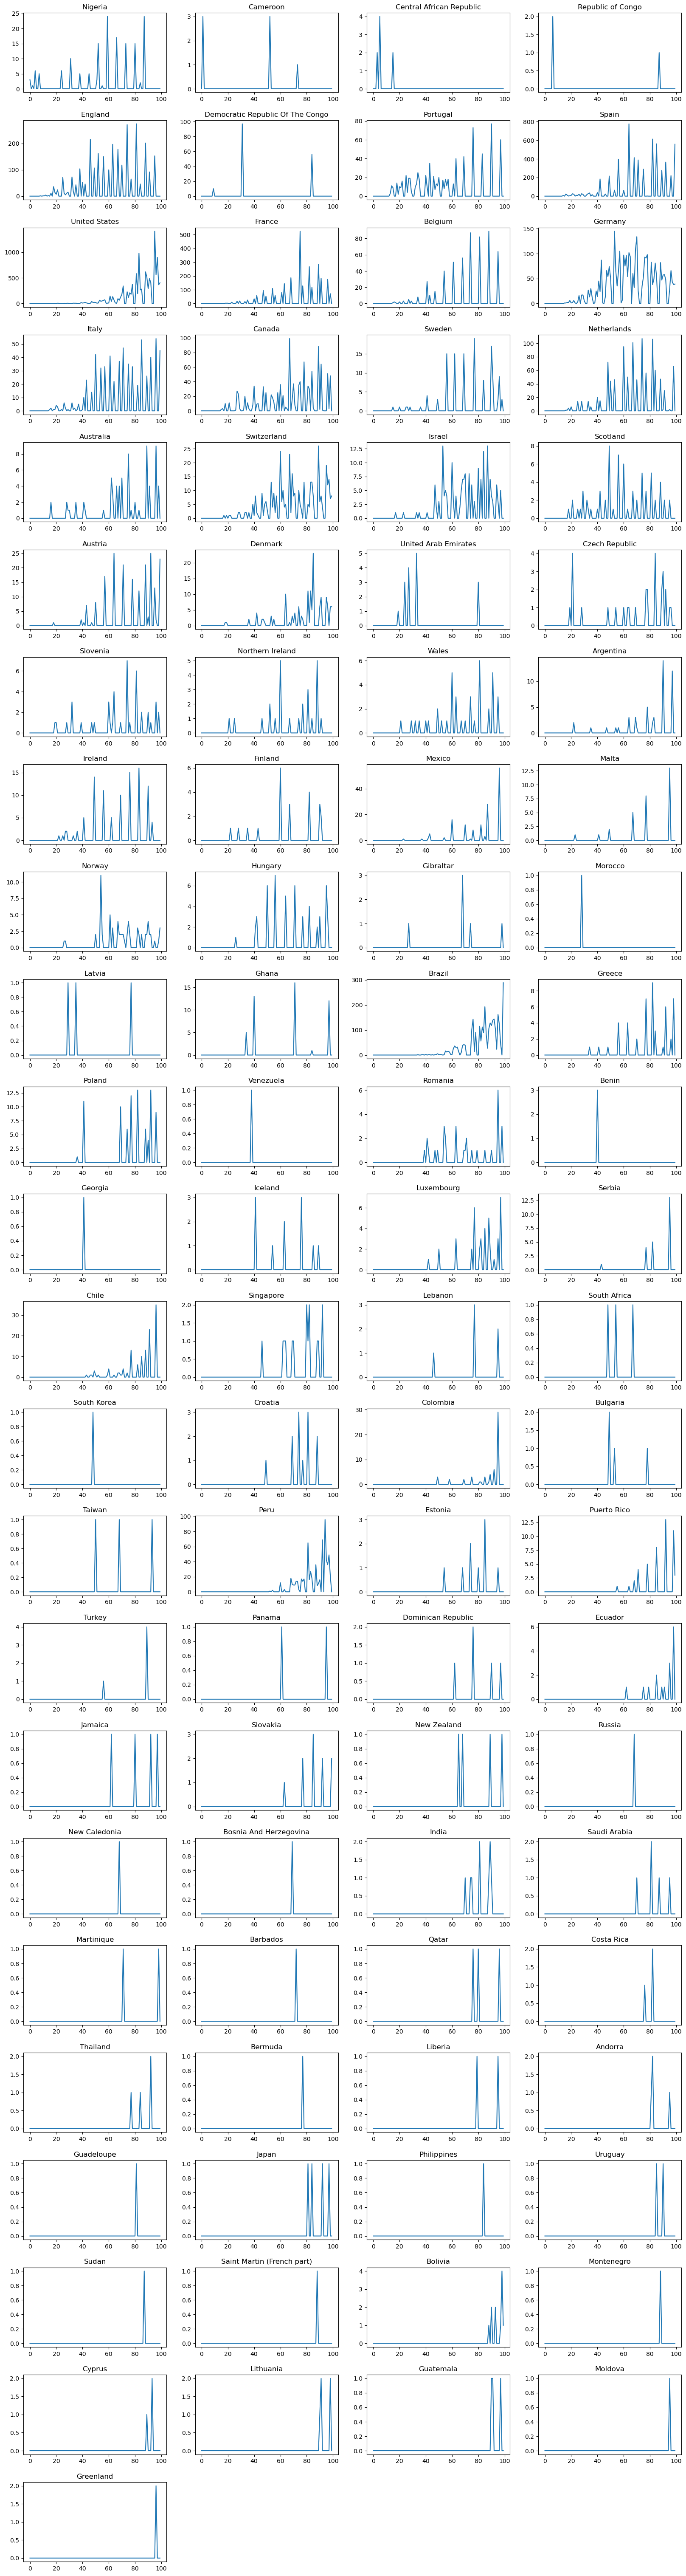

In [14]:
plt.figure(figsize=(20,75))
for j in range(0, len(casesCountry_dataset.columns.values)):
    X = []
    Y = []
    for i in range(0, len(casesCountry_dataset.iloc[:,j])):
        Y.append(i)
        X.append(casesCountry_dataset.iloc[:,j][i])
    plt.subplot(24,4,j+1)
    plt.plot(Y,X)
    plt.title(casesCountry_dataset.columns.values[j])

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
plt.show

<div style="background-color:#00278f;
            border-top-left-radius: 50px;
            border-bottom-right-radius: 50px;
            height:60px;
            text-align: center;
            width: 600px;
            margin: auto;
            padding-top: 6px;"> <h2 style="color: white;">Global cases graph</h2> </div>

<function matplotlib.pyplot.show(close=None, block=None)>

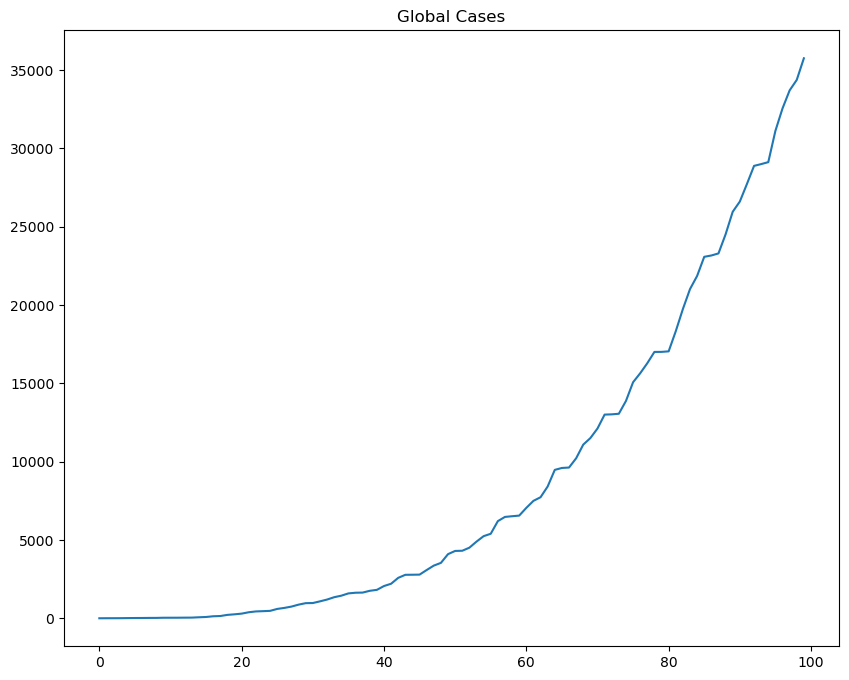

In [15]:
plt.figure(figsize=(10,8))

temp = 0
X = []
Y = []
for i in range(0, len(casesCountry_dataset.iloc[:,0])):
    for j in range(0, len(casesCountry_dataset.columns.values)):
        temp = temp + casesCountry_dataset.iloc[:,j][i]
    Y.append(i)
    X.append(temp)

plt.plot(Y,X)
plt.title("Global Cases")

plt.show

In [16]:
palette.reverse()

In [17]:
#Tomado de https://www.kaggle.com/code/amiragk/monkeypox-analysis-a1222b
fig = px.choropleth(data_frame = final_dataset,
                    locations="Country", locationmode="country names", color="Cases",
                    color_continuous_scale=palette,height= 500,scope="world",
                    labels={"Confirmed_Cases":"Confirmed Cases"})

fig.update_layout(title={"text": "Origins of Confirmed Monkeypox Cases",
                         "y":0.9,
                         "x":0.5,
                         "xanchor": "center",
                         "yanchor": "top"})
fig.show()

In [18]:
final_dataset

Country                               Region  Population  \
4                 Andorra  WESTERN EUROPE                            71201   
8               Argentina              LATIN AMER. & CARIB        39921833   
11              Australia  OCEANIA                                20264082   
12                Austria  WESTERN EUROPE                          8192880   
17               Barbados              LATIN AMER. & CARIB          279912   
..                    ...                                  ...         ...   
206                Turkey  NEAR EAST                              70413958   
212  United Arab Emirates  NEAR EAST                               2602713   
214         United States  NORTHERN AMERICA                      298444215   
215               Uruguay              LATIN AMER. & CARIB         3431932   
218             Venezuela              LATIN AMER. & CARIB        25730435   

     Cases  
4        4  
8       49  
11      71  
12     198  
17       1  
..     ...  
206      5  
212     16  
214  11130  
215      2  
218      1  

[82 rows x 4 columns]

In [19]:
encoder = preprocessing.LabelEncoder()
encodedFinal_dataset = final_dataset[['Region','Population','Cases']]
encodedFinal_dataset['Region'] = encoder.fit_transform(encodedFinal_dataset['Region'].values)
encodedFinal_dataset

Region  Population  Cases
4        10       71201      4
8         4    39921833     49
11        8    20264082     71
12       10     8192880    198
17        4      279912      1
..      ...         ...    ...
206       5    70413958      5
212       5     2602713     16
214       7   298444215  11130
215       4     3431932      2
218       4    25730435      1

[82 rows x 3 columns]

In [20]:
encodedFinal_dataset.corr().style.background_gradient().set_precision(4)

In [21]:
X = encodedFinal_dataset.iloc[:, [1, 2]].values
X

array([[     71201,          4],
       [  39921833,         49],
       [  20264082,         71],
       [   8192880,        198],
       [    279912,          1],
       [  10379067,        546],
       [   7862944,          3],
       [     65773,          1],
       [   8989046,         11],
       [ 188078227,       2747],
       [   7385367,          4],
       [  17340702,          7],
       [  33098932,       1058],
       [  16134219,        126],
       [  43593035,         55],
       [   4075261,          3],
       [   4494749,         12],
       [    784301,          3],
       [  10235455,         29],
       [   5450661,        141],
       [   9183984,          5],
       [  13547510,         16],
       [   1324333,          9],
       [   5231372,         22],
       [  60876136,       2659],
       [   4661473,          1],
       [  82422299,       3102],
       [  22409572,         47],
       [     27928,          6],
       [  10688058,         48],
       [  

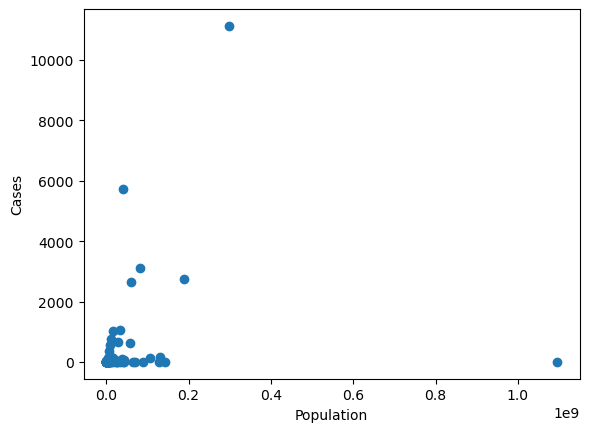

In [22]:
# Visualizing the dataset
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Population')
plt.ylabel('Cases')
plt.show()

In [23]:
encoder.classes_.shape

(11,)

In [24]:
# Fitting K-Means to the dataset

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 11, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [25]:
kmeans.cluster_centers_

array([[2.50104769e+06, 1.78857143e+01],
       [1.09535200e+09, 9.00000000e+00],
       [1.34072294e+08, 5.40000000e+01],
       [6.35137995e+07, 8.28000000e+02],
       [2.98444215e+08, 1.11300000e+04],
       [3.92767231e+07, 8.71375000e+02],
       [1.88078227e+08, 2.74700000e+03],
       [1.07449525e+08, 1.47000000e+02],
       [2.19032444e+07, 1.96900000e+02],
       [8.59454880e+07, 1.55150000e+03],
       [9.47713238e+06, 1.48937500e+02]])

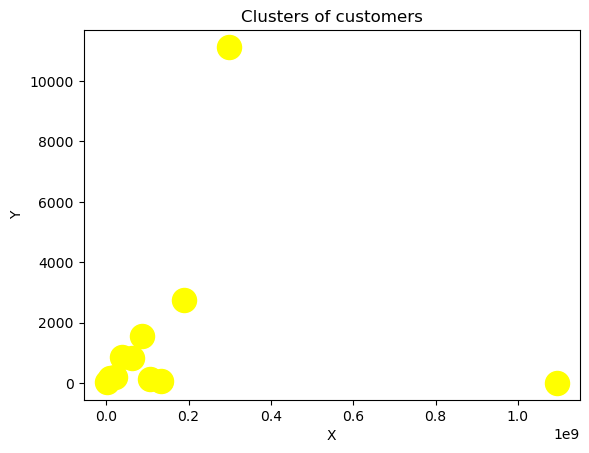

In [26]:
# Visualizing the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()